In [1]:
from multicorner import mcorner
import corner as corner
import numpy as np

## A Short Test

Let's start by generating a multivariate distribution with random covariances. We'll assume these two distributions are widely spaced with few points in-between them

In [2]:
np.random.seed(42)

# Generate random covariance matrices with sigmas ~ 1
def random_covariance():
    A = np.random.rand(3, 3)
    cov = np.dot(A, A.T)  # Ensure it's positive semi-definite
    return cov 

In [3]:
mean1 = np.array([0,5,10])  # Random center
cov1 = random_covariance()
cov2 = random_covariance()
cov3 = random_covariance()

# Generate data, trimodal distribution (same covariance)
data1 = np.random.multivariate_normal(mean1, cov1, 5000)
data2 = np.random.multivariate_normal(mean1+100, cov1, 1000)
data3 = np.random.multivariate_normal(mean1+200, cov1, 1000)
dataset1 = np.vstack((data1, data2, data3))


# Generate data, trimodal distribution (different covariances)
data1 = np.random.multivariate_normal(mean1, cov1, 5000)
data2 = np.random.multivariate_normal(mean1+100, cov2, 1000)
data3 = np.random.multivariate_normal(mean1+200, cov3, 1000)
dataset2 = np.vstack((data1, data2, data3))

## Showing Covariances in Orientation plots 

While the covariances of the individual distributions can be seen in the bottom triangle panel, there are some applications in which a user might care about the relative orientations of the covariances of each mode.  These deductions can be made easier by using the nsigma flag, to scale up the covariances so they are visible at a large scale. The argument used is the $\sigma$ of the the ellipse definde by the covariance of the mode. In the bottom plot, we show an example of this showing we can tell the difference between modes with the same, and different, covariances. 

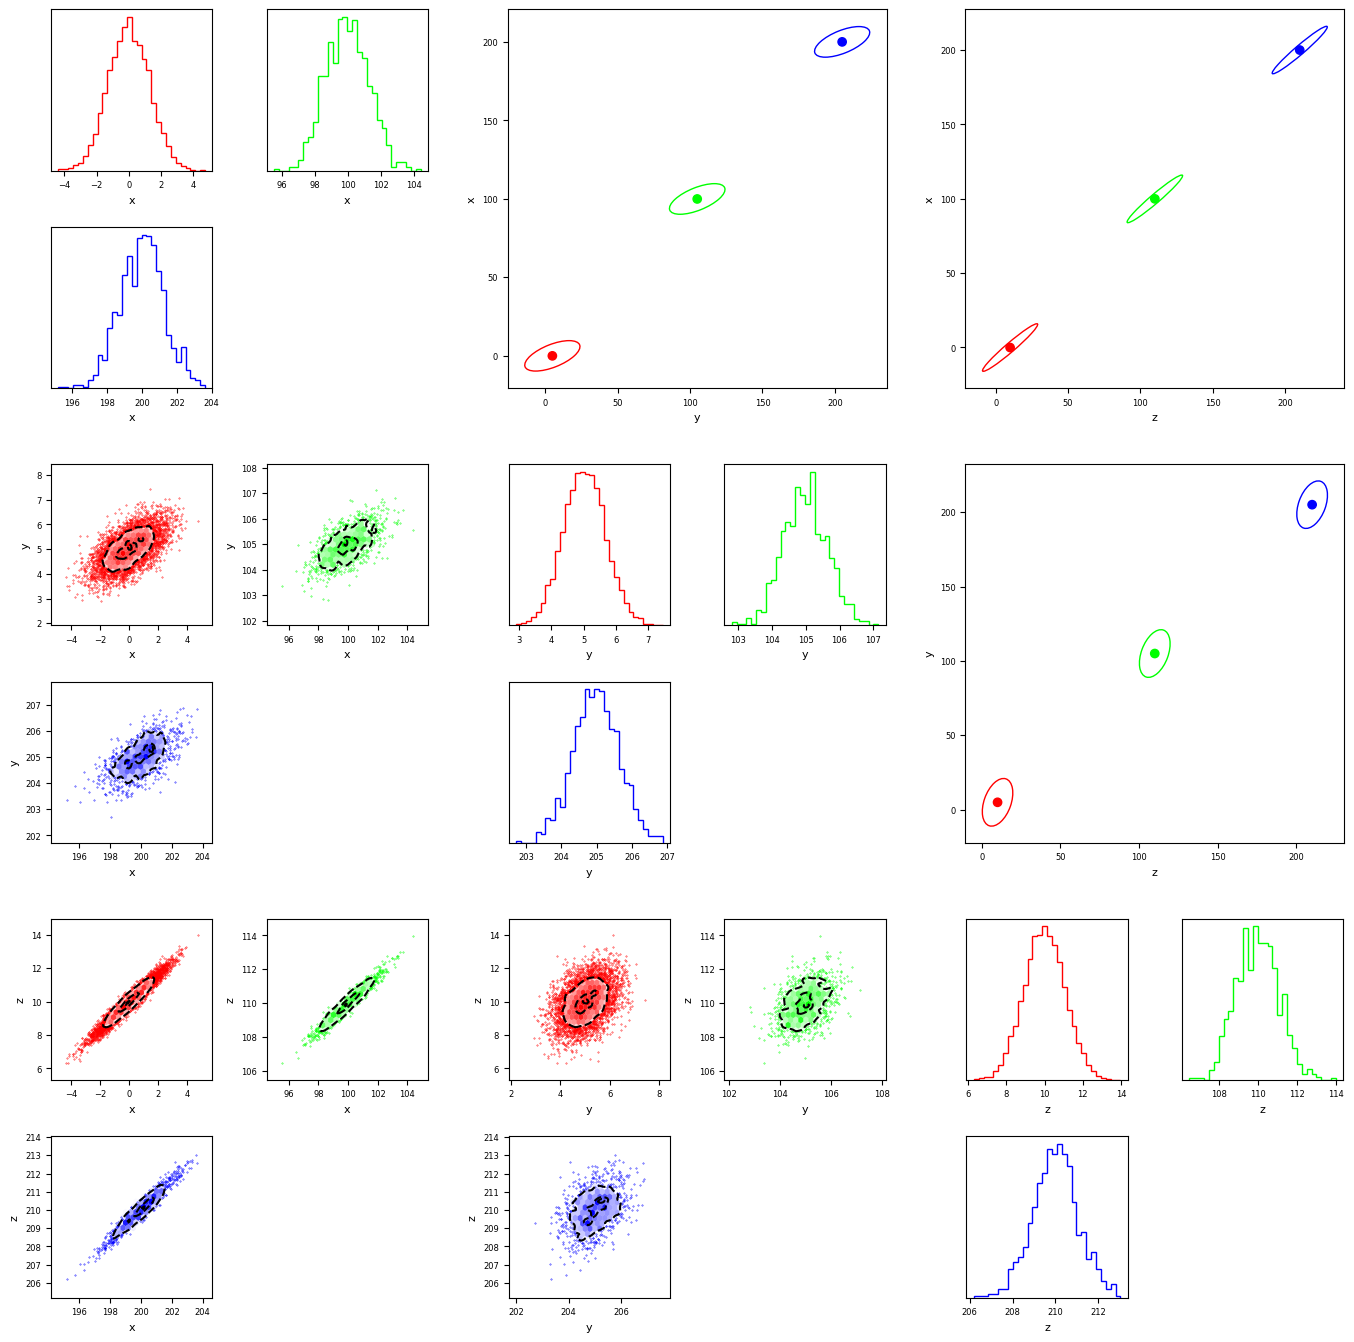

In [4]:
fig = mcorner(dataset1,labels=['x','y','z'],confidence_ellipse=True,nsigma=15)

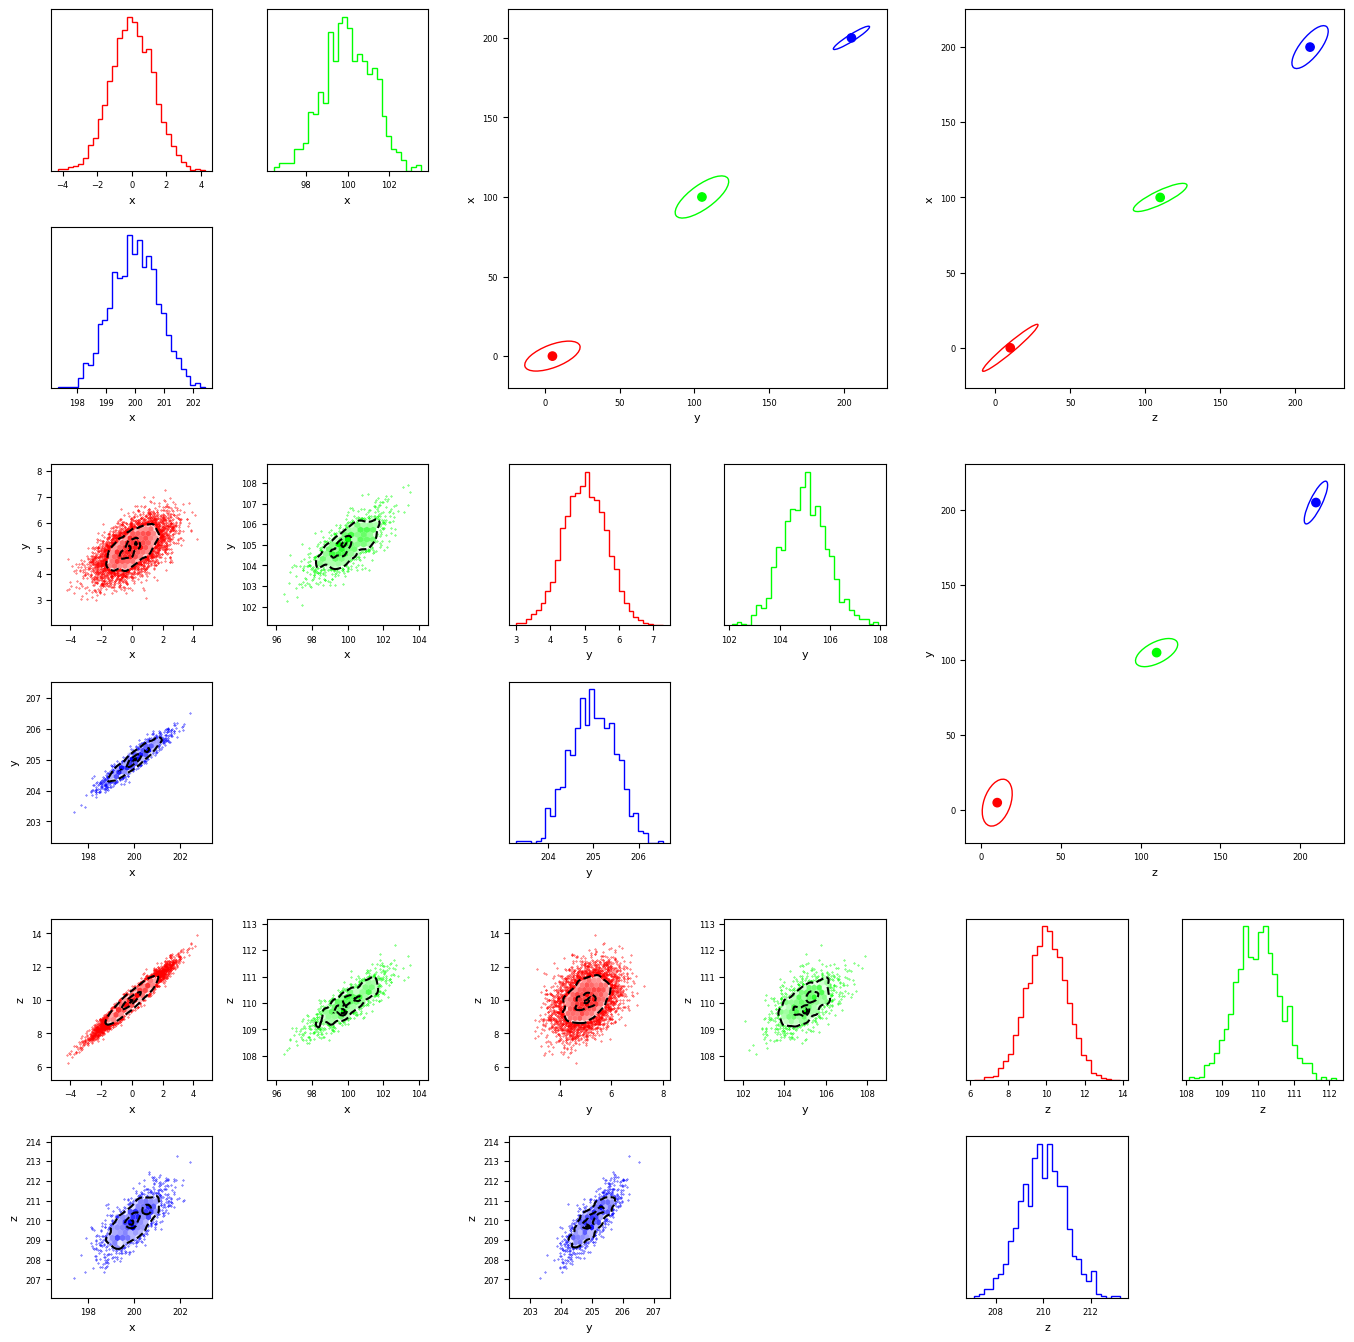

In [5]:
fig = mcorner(dataset2,labels=['x','y','z'],confidence_ellipse=True,nsigma=15)

In some cases, the modes may have totally different sizes.  To get a qualitative view of their orientations (the quantative info is in the lower triangle plot) we can choose a custom scaling  for each covariance matrix so they are all visible. 

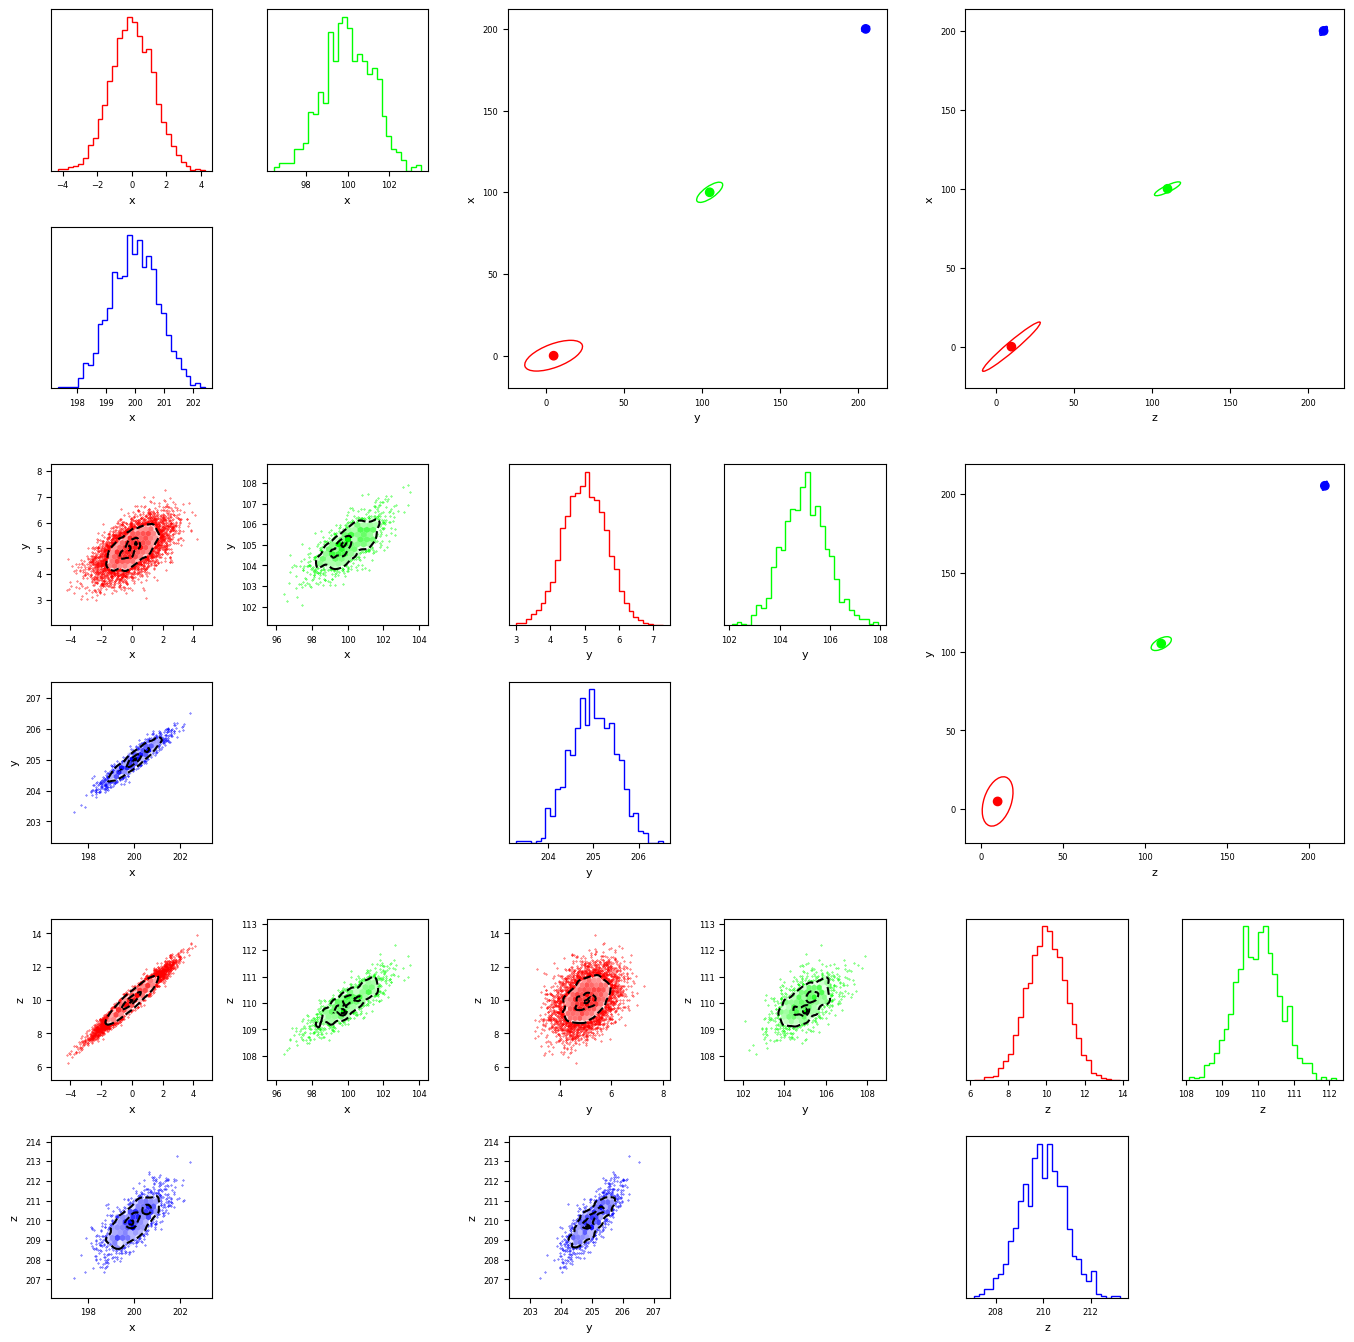

In [6]:
fig = mcorner(dataset2,labels=['x','y','z'],confidence_ellipse=True,nsigma=[15,7,3])

Finally, its worth noting the limitation that the distributions in the orientation plot will always be that of the neareast fit gaussian, they will not reflect the underlying distributions found in the lower-triangular part of the matrix. 